In [442]:
import random
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [443]:
# Define the blueprint of the city object
class city:

  def __init__(self, name, x, y):
    self._name = name
    self._x = x
    self._y = y
    self._visited = False

  @property
  def name(self):
    return self._name

  @name.setter
  def name(self, name):
    self._name = name


  @property
  def x(self):
    return self._x

  @x.setter
  def x(self, x):
    self._x = x


  @property
  def y(self):
    return self._y

  @y.setter
  def y(self, y):
    self._y = y


  @property
  def visited(self):
    return self._visited

  @visited.setter
  def visited(self, visited):
    self._visited = visited

## **1. Reading the Data**

In [444]:
df = pd.read_csv("/content/Data set CSV.csv")

In [445]:
df.head()

,City,x,y
0,1,5.500000e-08,9.860000e-09
1,2,-2.887330e+01,-7.980000e-08
2,3,-7.929160e+01,-2.140330e+01
3,4,-1.465770e+01,-4.338960e+01
4,5,-6.474730e+01,2.189820e+01


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    15 non-null     int64  
 1   x       15 non-null     float64
 2   y       15 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 492.0 bytes


## **2. Mapping the Data To Objects**

In [447]:
cities_objects = []     # Initialize an empty cities list

 # Iterate through each row (city data) in the dataframe
for index, row in df.iterrows():
  x, y = row['x'], row['y']       # Get city coordinates
  name = row['City']              # Get city name
  city_obj = city(name, x, y)     # Create city object from the data
  cities_objects.append(city_obj)   # Append the city object to the cities

In [448]:
cities_objects

## **3. Choose the starting City At Random**

In [449]:
def random_city(cities):
  '''
    Args:
      cities (list): List of all city objects in the dataframe.

    Returns:
      starting_city (city): The starting city object we got at random.
  '''

  random_indx = random.randint(0, len(cities)-1)    # Get a random integer
  random_indx = 0
  starting_city = cities[random_indx]             # Get the city corresponding to that random integer

  return starting_city

In [450]:
starting_city = random_city(cities_objects)
starting_city.name

1.0

## **4. Getting the remaining cities**

In [451]:
def get_remaining_cities(starting_city, cities):
    '''
      Args:
        starting_city (city): The starting city object we got at random.
        cities (list): List of all city objects in the dataframe.

      Returns:
        remaining_cities (list): The remaining citis after excluding the starting city.
    '''

    remaining_cities = [city for city in cities if city.name != starting_city.name]

    return remaining_cities

In [452]:
remaining_cities = get_remaining_cities(starting_city, cities_objects)

In [453]:
pprint([city.name for city in remaining_cities])

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]


## **5. Getting the Minimum Distance To other non-visited cities**

In [454]:
def get_city_with_minimum_distance(starting_city, remaining_cities):

  '''
    Args:
      starting_city (city): The starting city object we got at random.
      remaining_cities (list): The remaining citis after excluding the starting city.

    Returns:
      winning_city (city): The city object with minimum distance to that starting city.
      min_dist (float) : The minimum distance to the starting point.
  '''

  min_dist = np.inf
  winning_city = remaining_cities[0]

  for city_obj in remaining_cities:

    euc_dist = np.sqrt((city_obj.x - starting_city.x)**2 + (city_obj.y - starting_city.y)**2)

    if (euc_dist <= min_dist) and (city_obj.name != starting_city.name) and (not city_obj.visited):
      min_dist = euc_dist
      winning_city = city_obj

  return winning_city, min_dist

## **6. Getting the path**

In [455]:
path = [starting_city]  # Initialize the path as a list with the starting city as the beginning
final_city = starting_city
starting_city.visited = True
total_cost = 0.0

# Loop through the remaining cities
for iter in range(len(cities_objects)):
  winning_city, min_dist = get_city_with_minimum_distance(starting_city, remaining_cities)

  # If we are in the final iteration set cost to distance between the starting city and the final one
  if iter == len(cities_objects) - 1:
    min_dist = euc_dist = np.sqrt((starting_city.x - final_city.x)**2 + (starting_city.y - final_city.y)**2)

  total_cost += min_dist
  starting_city = winning_city    # Update our starting city
  path.append(winning_city)   # Append the visited city to our path
  winning_city.visited = True     # Mark the city as visited

path[-1] = final_city

In [456]:
pprint([city.name for city in path])

[1.0,
 13.0,
 2.0,
 15.0,
 9.0,
 5.0,
 7.0,
 3.0,
 12.0,
 14.0,
 10.0,
 8.0,
 6.0,
 4.0,
 11.0,
 1.0]


## **7. Get the total cost**

In [457]:
print('The total cost of traveling is: ', total_cost)

The total cost of traveling is:  284.3810904080332


## **8. Plotting the path**

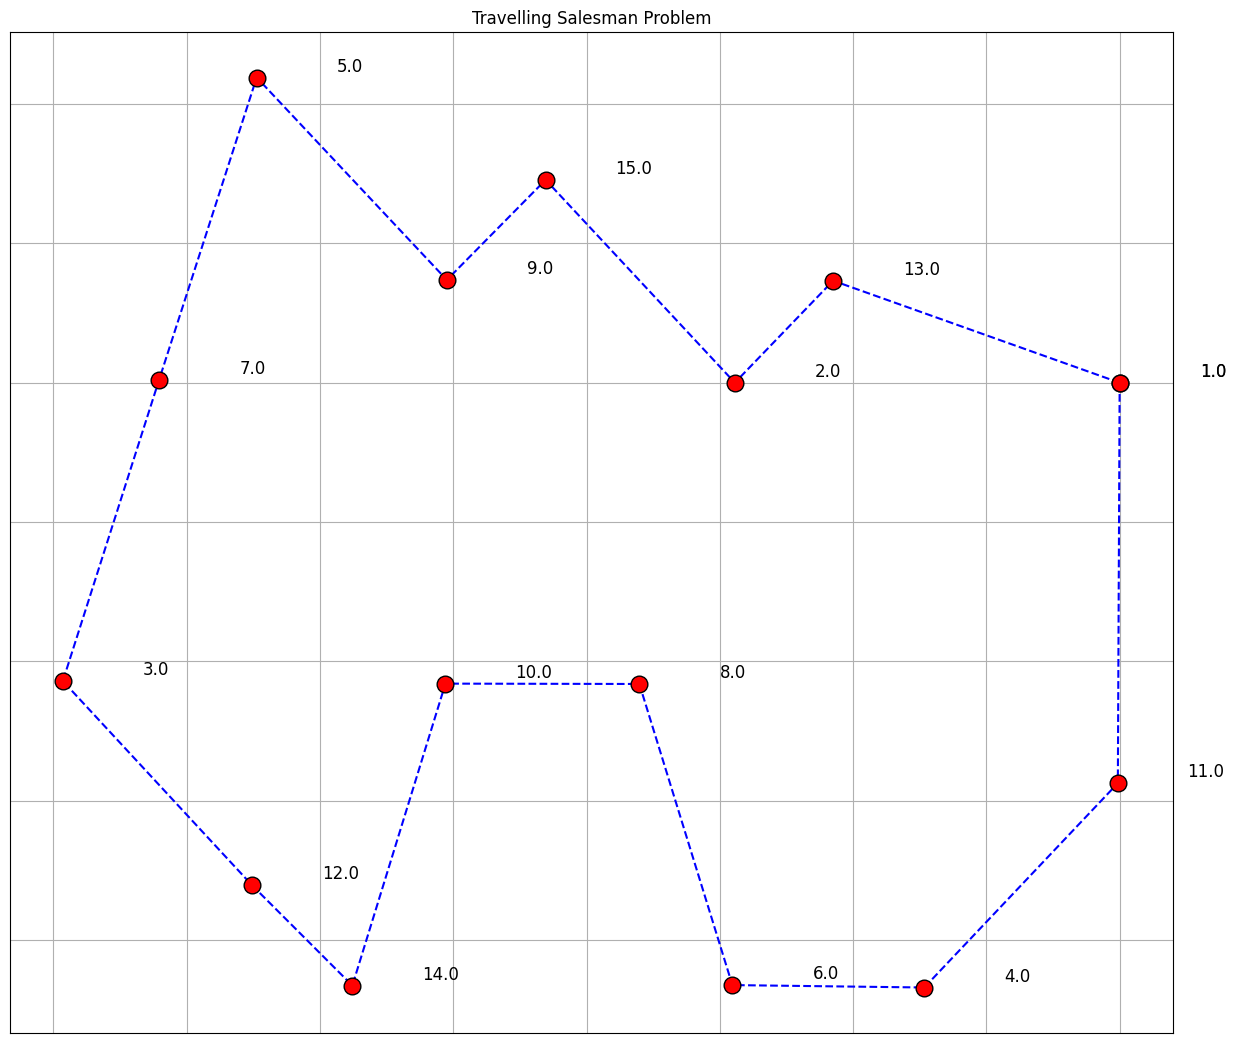

In [458]:
x = [city.x for city in path]       # Get x-coordinates for the cities
y = [city.y for city in path]        # Get y-coordinates for the cities
names = [city.name for city in path]     # Get city names

plt.figure(figsize=(15, 13))
plt.plot(x, y, marker='o', markersize=12, markerfacecolor='red', markeredgecolor='black', color='blue', linestyle='dashed')
plt.grid()
#plt.xlabel('Path')
#plt.ylabel('City Name')
plt.title('Travelling Salesman Problem')

# Remove axes ticks
plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

# Annotating cities
for x_point, y_point, name in zip(x, y, names):
    plt.text(x_point+8, y_point+0.45, name, fontsize=12, ha='right')

plt.show()    # Show the plot